In [532]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import cv2

from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [533]:
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU')) 

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [534]:
tf.__version__


'2.7.0'

In [535]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [536]:
path512 = "dataset_sidi_512.csv"
path = "dataset_sidi_v1.2.csv"
df512 = pd.read_csv(path512, sep='\t')

#so com duas classes

from sklearn.utils import shuffle
df512 = shuffle(df512)
df512

,Unnamed: 0,Unnamed: 0.1,image_name,NEG,NEU,POS,text,sent_text,sent_image,image_path,image_height,image_width
1101,415720,415720,800637990229815296-1,0.458655,0.435403,0.105942,@AskPlayStation my account got banned and I ha...,NEG,0,data/80063/800637990229815296-1.jpg,1536,2048
6025,15525,15525,769032642893320193-1,0.009142,0.061676,0.929181,RT @morgan_price13: It was an awesome night!❤️...,POS,2,data/76903/769032642893320193-1.jpg,2048,1536
1720,362371,362371,796804216022962180-1,0.829711,0.111822,0.058466,???????? I Fuck It Up Every Time #KingyPhotos ...,NEG,0,data/79680/796804216022962180-1.jpg,2048,1365
4753,231955,231955,782437948889272320-1,0.006742,0.112420,0.880838,Learning to say goodbye—w https://t.co/VOCIFWe...,POS,2,data/78243/782437948889272320-1.jpg,768,1024
4728,329462,329462,784522857715994627-1,0.017643,0.053174,0.929183,Happy birthday Sarah!! Ilysm and I hope your d...,POS,2,data/78452/784522857715994627-1.jpg,1080,1920
...,...,...,...,...,...,...,...,...,...,...,...,...
1719,353043,353043,796218410174713856-1,0.716052,0.226798,0.057150,Can't Stump The Trump! ????????????❤️ https://...,NEG,0,data/79621/796218410174713856-1.jpg,1024,576
8694,133271,133271,780536863803138048-1,0.027858,0.880886,0.091256,got this in the mail today #emaw #wildcats htt...,NEU,1,data/78053/780536863803138048-1.jpg,2048,1536
2772,388012,388012,798701773686853632-3,0.482745,0.404692,0.112563,Here are selfies I never posted before https:/...,NEG,0,data/79870/798701773686853632-3.jpg,1365,2048
11149,113094,113094,769571837449740288-1,0.010035,0.911801,0.078164,RT @keyannaaaaw: when she say she got the free...,NEU,1,data/76957/769571837449740288-1.jpg,1149,749


In [537]:

#TODA
#filenames = ['./Dataset/b-t4sa_imgs/' + fname for fname in df512['image_path'].tolist()]

#Reduzido
filenames = ['./Dataset512/' + fname+".jpg" for fname in df512['image_name'].tolist()]

labels = df512['sent_image'].tolist()
#labels = [1 if i==2 else i  for i in labels]

x_train, val_filenames, y_train, val_labels = train_test_split(filenames,labels, train_size=0.8,random_state=42)

x_val, x_test_filename, y_val, y_test = train_test_split(val_filenames,val_labels, train_size=0.5,random_state=42)

In [538]:
len(y_train), len( y_val), len( y_test)

(9600, 1200, 1200)

In [539]:
from keras.utils.np_utils import to_categorical   

y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [540]:
tf.keras.backend.clear_session()
import gc
gc.collect()

100

## VGG


In [541]:
tf.keras.backend.clear_session()
import gc
gc.collect()

100

In [542]:
tf.keras.backend.clear_session()
import gc
gc.collect()

100

In [543]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input


width = 128
height = 128
channels = 3

#sem utilizar os pesos
base_model = VGG19(weights=None, include_top=False, input_shape=(width, height, channels))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [544]:
flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 20,048,963
Trainable params: 20,048,963
Non-trainable params: 0
_________________________________________________________________


In [545]:

#opt =tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=0.000002)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### FIT GENERATOR

In [546]:
#busca os dados que estão listados em train_filenames
import random
def generate_data(train_filenames,train_labels, batch_size):

    width = 128
    height = 128
    dim = (width, height)
    while True:
        
        mistura = list(zip(train_filenames, train_labels))
        
        random.shuffle(mistura)

        train_filenames, train_labels = zip(*mistura)
        for i in range(0,len(train_filenames),batch_size):
            
            X_train = np.zeros((int(batch_size), width, height, 3))
            aux =0

            dim = (width, height)

            for j in train_filenames[i:i+batch_size]:
                X_train[aux] =  np.asarray(cv2.resize(cv2.imread(j), dim, interpolation = cv2.INTER_AREA) )
                aux = aux + 1
                
            img = X_train.reshape(( X_train.shape[0],) +(width, height,3)).astype('float32') / 255.
            #img = preprocess_input(img) 
            
            yield (img, np.array(train_labels[i:i+batch_size]))

In [547]:
#dobra para 48 pra vê se tanka

batch_size=24
batch_size

24

In [548]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2,  restore_best_weights=True)
epocas = 500

model.fit( generate_data(x_train, y_train, batch_size),validation_steps=50,steps_per_epoch=400, callbacks=[es],
        batch_size=batch_size,  epochs=epocas,validation_data=generate_data(x_val,y_val, batch_size))

Epoch 1/500
400/400 [==============================] - 48s 118ms/step - loss: 1.0986 - accuracy: 0.3332 - val_loss: 1.0986 - val_accuracy: 0.3517
Epoch 2/500
400/400 [==============================] - 49s 122ms/step - loss: 1.0983 - accuracy: 0.3348 - val_loss: 1.0981 - val_accuracy: 0.3542
Epoch 3/500
400/400 [==============================] - 49s 123ms/step - loss: 1.0969 - accuracy: 0.3527 - val_loss: 1.0952 - val_accuracy: 0.3650
Epoch 4/500
400/400 [==============================] - 51s 127ms/step - loss: 1.0940 - accuracy: 0.3705 - val_loss: 1.0929 - val_accuracy: 0.3642
Epoch 5/500
400/400 [==============================] - 53s 132ms/step - loss: 1.0924 - accuracy: 0.3711 - val_loss: 1.0920 - val_accuracy: 0.3725
Epoch 6/500
400/400 [==============================] - 60s 150ms/step - loss: 1.0914 - accuracy: 0.3736 - val_loss: 1.0914 - val_accuracy: 0.3700
Epoch 7/500
400/400 [==============================] - 51s 127ms/step - loss: 1.0905 - accuracy: 0.3760 - val_loss: 1.0908 -

### Resultados

In [549]:
x_test = np.zeros((len(y_test), width, height, 3))
aux =0

dim = (width, height)

for i in x_test_filename:
    x_test[aux] = np.asarray(cv2.resize(cv2.imread(i), dim, interpolation = cv2.INTER_AREA) )
    aux = aux + 1
x_test = x_test.reshape((x_test.shape[0],) +(width, height,3)).astype('float32') / 255.

In [550]:
y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis=-1)
test_labels_result= np.argmax(y_test, axis=-1)

print(accuracy_score(test_labels_result, y_pred));
print(classification_report(test_labels_result, y_pred));

0.4091666666666667
              precision    recall  f1-score   support

           0       0.48      0.33      0.39       411
           1       0.40      0.55      0.46       402
           2       0.37      0.35      0.36       387

    accuracy                           0.41      1200
   macro avg       0.42      0.41      0.40      1200
weighted avg       0.42      0.41      0.40      1200



Negativo - 0     Neutro - 1      Positivo - 2


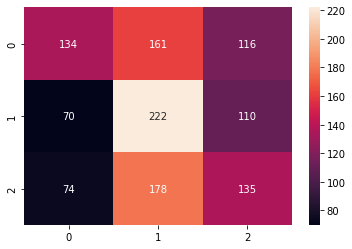

In [551]:
print("Negativo - 0     Neutro - 1      Positivo - 2")
sns.heatmap(confusion_matrix(test_labels_result, y_pred), annot=True, fmt="d");